#### Part 1

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
def triangulation(proj1, proj2, pt1, pt2):
    """
    write your code to triangulate the points in 3D
    """
    X = []
    for x1, y1, x2, y2 in np.concatenate((pt1, pt2), axis=1):
      A = []
      A.append(x1 * proj1[2] - proj1[0])
      A.append(y1 * proj1[2] - proj1[1])
      A.append(x2 * proj2[2] - proj2[0])
      A.append(y2 * proj2[2] - proj2[1])
      U, S, VT = np.linalg.svd(np.array(A))
      Xi = VT[-1]
      Xi = Xi / Xi[-1]
      X.append(Xi[:-1])
    return np.array(X)

def read_projection_matrix(filepath):
    # Load data from JSON file
    with open(filepath, 'r') as file:
        data = json.load(file)

    # Extract intrinsic parameters without distortion
    f = np.array(data['intrinsics_w_distortion']['f'][0])  # Focal lengths [fx, fy]
    c = np.array(data['intrinsics_w_distortion']['c'][0])  # Principal points [cx, cy]

    # Form the intrinsic matrix K
    K = np.zeros((3, 3))
    K[0, 0] = f[0]
    K[1, 1] = f[1]
    K[0, 2] = c[0]
    K[1, 2] = c[1]
    K[2, 2] = 1

    # Extract extrinsic parameters
    R = np.array(data['extrinsics']['R'])  # Rotation matrix
    T = np.array(data['extrinsics']['T']).reshape(-1, 1)  # Translation vector

    # Form the extrinsic matrix [R | T]
    RT = np.hstack((R, T)) 

    # Compute the projection matrix P = K [R | T]
    P = K@RT

    print("Projection matrix is ", P)

    return P

# Write your code here for computing camera centers
def calc_camera_center(camera_projection):
    """
    write your code to get camera center in the world 
    from the projection matrix
    """
    # <YOUR CODE>

    #camera center is the nullspace of the camera projection matrix 
    u,s,vt = np.linalg.svd(camera_projection)

    return vt[-1] / vt[-1,-1]
    pass
def load_keypoints(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    return [np.array(data[frame]['keypoints']) for frame in range(len(data))]
    # return np.array(data[0]['keypoints'])


#### Part 2

In [3]:
kp_file = open("keypoints_data2.json")
data = json.load(kp_file)
coord = data[0]['keypoints']
print(len(data))
coord = data[10]['keypoints']
coord

354


[[478.04704180628164, 384.9112654034368],
 [446.3098696795379, 389.95292415169155],
 [446.0440400801371, 498.1506646279799],
 [453.4276889142687, 608.3252621961288],
 [509.2917161843844, 380.46630886396645],
 [506.58818736510176, 486.58768842254074],
 [518.9366077603054, 594.0300765799104],
 [489.30032800961385, 327.1435216229811],
 [474.8970697134826, 264.9018105228676],
 [472.65393150277816, 239.0623899288023],
 [476.377087551066, 211.5055550999188],
 [443.8216933503884, 284.9902062913894],
 [418.16340018682064, 353.29129400837553],
 [401.75470414847166, 407.9941980383071],
 [509.279078229158, 280.8918099774145],
 [538.4152281075433, 342.8562998889728],
 [540.4796680199535, 394.1277567214198],
 [434.4034542218791, 597.9981333795695],
 [426.0413356378781, 594.525223958872],
 [508.11400220830797, 589.4369713176425],
 [502.9690357719561, 588.1362159524328],
 [408.36915352977655, 397.56282488715385],
 [391.9102861604256, 426.8573634249354],
 [520.5187110254717, 386.17445646432134],
 [539

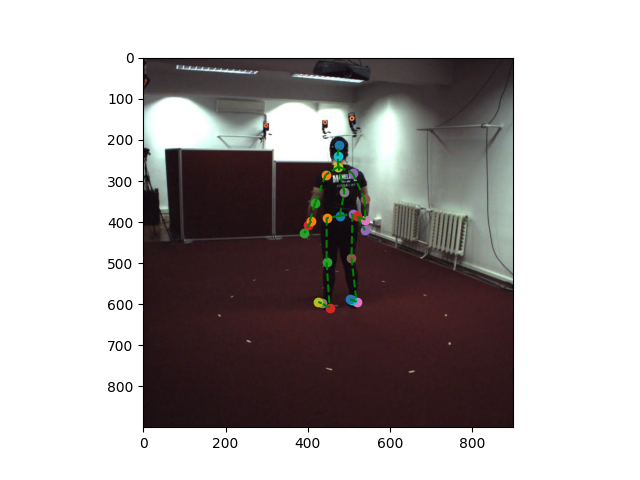

In [4]:
%matplotlib widget
im = cv2.imread("frame_0000_2.jpg")
fig, ax = plt.subplots()
ax.imshow(im)

for c in coord:
    plt.plot(c[0], c[1], 'o')

connections = [(0,1), (1,2), (2,3), (0,4), (4,5), (5,6), (0,7), (7,8), (8,11), (11,12), (12,13), (8,14), (14,15), (15,16), (8,9), (9,10), (3,17), (17,18), (6,19), (19,20), (13,21), (21,22), (16,23), (23,24)]

for start_idx, end_idx in connections:
    start_point = coord[start_idx]
    end_point = coord[end_idx]
    ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], color='green', linestyle='--')
# i = 17
# plt.plot(coord[i][0], coord[i][1], 'o')
plt.show()

In [5]:
proj1 = read_projection_matrix('001.json') # camera parameters
proj2 = read_projection_matrix('001_2.json')

Projection matrix is  [[-2.59949230e+01 -1.19154609e+03 -4.92007742e+01 -3.60816756e+03]
 [ 1.83610848e+02 -1.30300490e+02 -1.16221160e+03  2.82706534e+03]
 [ 8.94373595e-01 -4.00650985e-01 -1.98933810e-01  1.54806366e+00]]
Projection matrix is  [[ 8.50279280e+02 -7.44557074e+02 -6.88715949e+01 -3.56656181e+03]
 [ 2.48110257e+02  9.97894971e+01 -1.09695606e+03 -8.62906893e+02]
 [ 8.92023175e-01  4.14895802e-01 -1.79321300e-01  1.60884588e+00]]


In [6]:
proj = np.array([-825.6717, 759.5643, -84.3798, 4807.3865],
                 [-235.9241, -108.9417, -1092.5950, 2503.0299],
                 [-0.8962, -0.4042, -0.1831, 1.4634])



TypeError: array() takes from 1 to 2 positional arguments but 3 were given

In [8]:
json_file1 = 'keypoints_data2.json'
json_file2 = 'keypoints_data2-1.json'
keypoints1 = load_keypoints(json_file1)
keypoints2 = load_keypoints(json_file2)

#print(keypoints1.shape)

#print(np.hstack((keypoints1, keypoints2)).shape)

pose3d = [] 
num_frames = min(len(keypoints1), len(keypoints2))
#print(f"frame number is {num_frames}")

for f in range(num_frames):
    pose3d.append(triangulation(proj1, proj2, keypoints1[f], keypoints2[f]))

# pose3d = triangulation(proj1, proj2, keypoints1, keypoints2)


In [9]:
pose3d

[array([[ 1.27688948, -5.16989439,  0.33938196],
        [ 1.48675935, -5.09155839,  0.29378289],
        [ 1.15233935, -5.01252011,  0.04717128],
        [ 0.87304358, -4.94634098, -0.15699229],
        [ 1.07947401, -5.23601462,  0.37985868],
        [ 0.81184135, -5.14228645,  0.15945359],
        [ 0.54477006, -5.07662578, -0.01062728],
        [ 1.4298421 , -5.24099371,  0.4908163 ],
        [ 2.13238338, -5.26578903,  0.64867957],
        [ 2.77565756, -5.29741728,  0.72750016],
        [ 3.08630576, -5.33126923,  0.84618901],
        [ 2.16707052, -5.15624918,  0.57489459],
        [ 1.87039953, -5.03656846,  0.36137706],
        [ 1.87393168, -4.95673689,  0.17295176],
        [ 1.63286793, -5.33294802,  0.61802821],
        [ 1.03339001, -5.32148176,  0.48555635],
        [ 0.92048453, -5.28149208,  0.36578183],
        [ 1.07179092, -4.91554319, -0.20013252],
        [ 1.17272355, -4.90078697, -0.2256425 ],
        [ 0.66552326, -5.06561015, -0.04256307],
        [ 0.72835576

#### Part 3

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# Write your code here for triangulation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

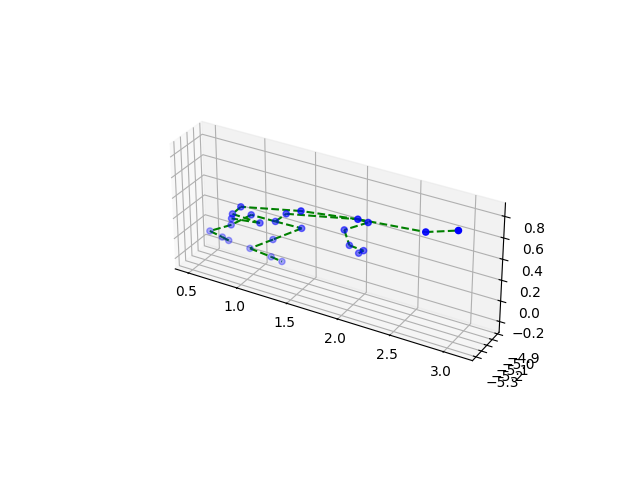

In [11]:
%matplotlib widget
# fig, ax = plt.subplots()

# for c in coord:
#     plt.plot(c[0], c[1], 'o')


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
frame = 10
ax.scatter(pose3d[frame][:, 0], pose3d[frame][:, 1], pose3d[frame][:, 2], c='b', label='Points')
connections = [(0,1), (1,2), (2,3), (0,4), (4,5), (5,6), (0,7), (7,8), (8,11), (11,12), (12,13), (8,14), (14,15), (15,16), (8,9), (9,10), (3,17), (17,18), (6,19), (19,20), (13,21), (21,22), (16,23), (23,24)]


for start_idx, end_idx in connections:
    start_point = pose3d[frame][start_idx]
    end_point = pose3d[frame][end_idx]
    ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], [start_point[2], end_point[2]], color='green', linestyle='--')

ax.set_aspect('equal')

#### Part 4

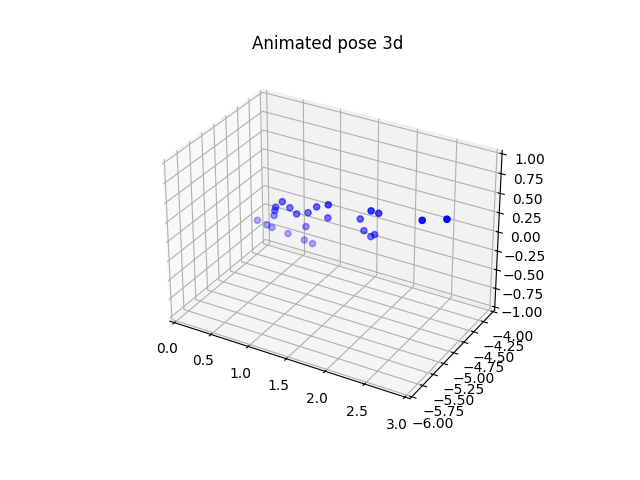

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Generate some sample data for demonstration
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initial frame
frame = 0
scat = ax.scatter(pose3d[frame][:, 0], pose3d[frame][:, 1], pose3d[frame][:, 2], c='b', label='Points')

# Define connections between points
connections = [(0,1), (1,2), (2,3), (0,4), (4,5), (5,6), (0,7), (7,8), (8,11), (11,12), (12,13), (8,14), (14,15), (15,16), (8,9), (9,10), (3,17), (17,18), (6,19), (19,20), (13,21), (21,22), (16,23), (23,24)]

lines = [ax.plot([], [], [], color='green', linestyle='--')[0] for _ in range(len(connections))]

def update(frame):
    scat._offsets3d = (pose3d[frame][:, 0], pose3d[frame][:, 1], pose3d[frame][:, 2])
    for i, (start_idx, end_idx) in enumerate(connections):
        start_point = pose3d[frame][start_idx]
        end_point = pose3d[frame][end_idx]
        lines[i].set_data([start_point[0], end_point[0]], [start_point[1], end_point[1]])
        lines[i].set_3d_properties([start_point[2], end_point[2]])
    return scat, lines

x_min, x_max = 0, 3
y_min, y_max = -6, -4
z_min, z_max = -1, 1

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])
# # ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
ax.set_title('Animated pose 3d')
ax.set_aspect('equal')
ani = FuncAnimation(fig, update, frames=100, interval=10)
plt.show()
ani.save('3d_pose_prototype_studio1.mp4', writer='ffmpeg', fps=20)